In [52]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Task 1:

def laguerre(t, n, beta = 2, sigma = 4):
    if n < 0 or beta < 0:
        raise ValueError('beta and n must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    l_0 = np.sqrt(sigma) * np.exp(-beta * t / 2)
    l_1 = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)

    if n == 0:
        return l_0
    if n == 1:
        return l_1
    if n >= 2:
        l_next = (2 * 2 - 1 - t * sigma) / 2 * l_1 - (2 - 1) / 2 * l_0
        for j in range(3, n+1):
            l_0 = l_1
            l_1 = l_next
            l_next = (2 * j - 1 - t * sigma) / j * l_1 - (j - 1) / j * l_0
        return l_next

print(f"Task 1: laguerre(7, 5, 2, 4) = {laguerre(7, 5, 2, 4)}\n")

Task 1: laguerre(7, 5, 2, 4) = -87.85447767364639



In [145]:
# Task 2:

def tabulate_laguerre(n, T, step = 0.1, beta = 2, sigma = 4):
    if beta < 0:
        raise ValueError('Value "beta" must be positive')

    if sigma < beta:
        raise ValueError('Value "sigma" must be greater than beta')

    if n < 0:
        raise ValueError('Value "n" must be positive')

    values = np.arange(0, T, step)
    results = []
    for i in values:
        results.append(laguerre(i, n, beta, sigma))
    
    return pd.DataFrame(data = {'value': values, f'L_{n}': results})


print("Task 2:")
tabulate_laguerre(2, 10)

Task 2:


,value,L_2
0,0.0,2.000000
1,0.1,0.506709
2,0.2,-0.458489
3,0.3,-1.007513
4,0.4,-1.233389
...,...,...
95,9.5,0.096858
96,9.6,0.089602
97,9.7,0.082870
98,9.8,0.076625


In [92]:
# Task 3:

def experiment(N = 20, beta = 2, sigma = 4, T = 100, eps = 0.001):
    if T < 0 or eps < 0 or N < 0 or beta < 0:
        raise ValueError('T, epsilon, N and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    step = 0.1
    values = np.linspace(0, T, 1000)
    n = range(0, N + 1)
    res = None
    
    for i in values:
        check = True
        for j in n:
            if abs(laguerre(i, j, beta, sigma)) > eps:
                check = False
                break
        if check and res is None:
            res = i
            break

    tabulation = []
    for i in n:
        tabulation.append(laguerre(res, i, beta, sigma))
    
    return res, pd.DataFrame(data = {'n': n, 'f': tabulation})

r, df = experiment()
print(f"Task 3: result = {r}\n")
df

Task 3: result = 79.07907907907908



,n,f
0,0,9.066138e-35
1,1,-2.858701e-32
2,2,4.478343e-30
3,3,-4.647081e-28
4,4,3.593209e-26
5,5,-2.208132e-24
6,6,1.123332e-22
7,7,-4.865604e-21
8,8,1.831625e-19
9,9,-6.087176e-18


In [61]:
# Task 4:

def rectangles(f, start, end, points = 1000):
    x = np.linspace(start, end, points)
    s = sum([f(i) for i in x])
    return s * abs(end - start) / points

def transform_laguerre(f, N, points = 1000, beta = 2, sigma = 4):
    if N < 0 or points < 0 or beta < 0:
        raise ValueError('N, points and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    def integral(t):
        return f(t) * laguerre(t, N, beta, sigma) * np.exp(-(sigma-beta) * t)
    
    end = experiment(N, beta, sigma)[0]
    
    return rectangles(integral, 0, end, points)

f = lambda x: np.exp(-x)
print(f"Task 4: {rectangles(f, 0, 100, 10000)}")

Task 4: 1.0049083341528509


In [68]:
# Task 5:

def transform_tabulate_laguerre(f, N, points = 1000, beta = 2, sigma = 4):
    if N < 0 or points < 0 or beta < 0:
        raise ValueError('N, points and beta must be positive')
    if beta > sigma:
        raise ValueError('beta must be less than sigma')
    
    values = range(0, N)
    results = []
    for i in values:
        results.append(transform_laguerre(f, i, points, beta, sigma))
    
    return pd.DataFrame(data = {'value': values, 'f': results})
    
def f(t):
    if t >= 2 * np.pi:
        return 0
    return np.sin(t - np.pi / 2) + 1

print("Task 5:")
transform_tabulate_laguerre(f, 20, 1000)

Task 5:


,value,f
0,0,0.066600
1,1,-0.182040
2,2,0.177896
3,3,-0.074216
4,4,0.007256
5,5,0.007581
6,6,-0.003094
7,7,-0.000615
8,8,0.000798
9,9,-0.000027


In [90]:
# Task 6:

def reversed_transform_laguerre(seq, t, beta = 2, sigma = 4):
    sum_res = 0
    
    for i in range(0, len(seq)):
        sum_res += seq[i] * laguerre(t, i, beta, sigma)
    
    return sum_res

def test_f(x):
    return x ** 2

test_seq = transform_tabulate_laguerre(test_f, 20, 1000)['f']

print("Task 6: ")
reversed_transform_laguerre(test_seq, 3)

Task 6: 


8.991189909755084

Task 7: 


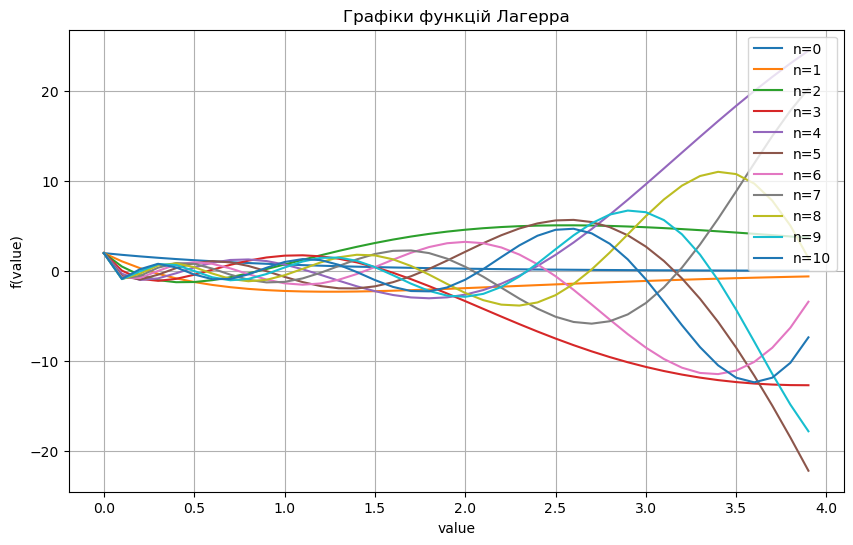

In [153]:
# Task 7:

def laguerre_graph(T, N, step = 0.1, beta = 2, sigma = 4):
    plt.figure(figsize = (10, 6))

    for n in range(0, N + 1):
        df_tabulation = tabulate_laguerre(n, T, step, beta, sigma)
        plt.plot(df_tabulation['value'], df_tabulation[f'L_{n}'], label = f'n={n}')

    plt.title('Графіки функцій Лагерра')
    plt.xlabel('value')
    plt.ylabel('f(value)')
    plt.legend()
    plt.grid()
    plt.show()
    
print("Task 7: ")
laguerre_graph(4, 10)

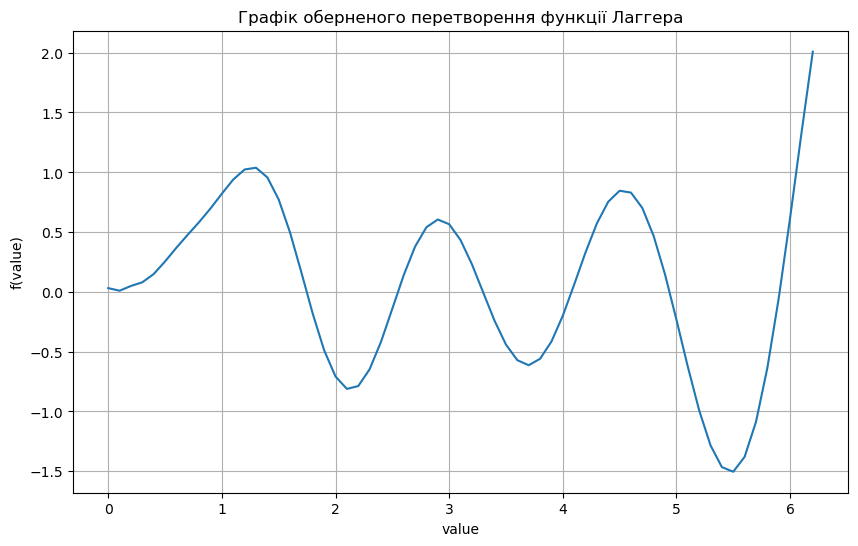

In [173]:
# Task 8:

def reversed_transform_laguerre_graph(f, N, T = np.pi * 2, step = 0.1, points = 1000, beta = 2, sigma = 4):
    seq = transform_tabulate_laguerre(f, N, points, beta, sigma)['f']
    values = np.arange(0, T, step)
    res = []
    for i in values:
        res.append(reversed_transform_laguerre(seq, i, beta, sigma))
        
    reversed_tabulation = pd.DataFrame(data = {'value': values, 'f(value)': res})
    
    plt.figure(figsize = (10, 6))

    plt.plot(reversed_tabulation['value'], reversed_tabulation['f(value)'])

    plt.title('Графік оберненого перетворення функції Лаггера')
    plt.xlabel('value')
    plt.ylabel('f(value)')
    plt.grid()
    plt.show()

def test_f2(x):
    return np.sin(x ** 2)

reversed_transform_laguerre_graph(test_f2, 20)